## Notes
- [ ] condon features
- [ ] imputation for the missing nucleotide
- [ ] distance matrix like to measure how close two sequence are
- [ ] PCA on distance matrix, distances would be features
- [ ] simple models
- [ ] generate data from phylogenetic tree
- [ ] high sample weights for false negatives

## Next Week
- [x] phylogentic tree
- [x] DendroPy
- [ ] frequency of nucleotides

# Explore data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dendropy
from Bio import SeqIO, Phylo
%matplotlib inline
pd.options.display.precision = 3

In [2]:
# load responses-pseudo.csv - the result of antibiotic resistence of pseudomonas
# 122 * 2 (2 antibiotics)
resp = pd.read_csv('../data/responses-pseudo.csv', names=['id', 'lab-id', 'carb', 'toby'], skiprows=1)
resp.drop('lab-id', axis=1, inplace=True)

In [3]:
# load concatenated.fasta - the gene sequence of pseudomonas
# 122 * (483333 -> 261868)
src = SeqIO.parse('../data/concatenated.fasta', 'fasta')
data = [(record.id, record.seq._data) for record in src]
seq = pd.DataFrame(data=data, columns=['id', 'sequence'])

In [4]:
# merge DataFrames of two files into one DataFrame
records = pd.merge(seq, resp, on='id')

In [5]:
# calculate missing number and percentage of nucleotides of each sequence
from collections import Counter

seq_len = np.mean(records['sequence'].apply(len))
records['missing'] = records['sequence'].apply(lambda seq: Counter(seq)['-'])

In [6]:
records['missing_percentage'] = records['missing'] / seq_len * 100
records

,id,sequence,carb,toby,missing,missing_percentage
0,TA151,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,True,False,31842,6.588
1,IC1,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,False,False,46071,9.532
2,A237,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,True,False,44514,9.210
3,5920,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,NaN,NaN,49497,10.241
4,LiA96,ATGAGTGATCTGCCAAGTCCGAAGAAACACAAGACCTCGAACTGGT...,False,False,44067,9.117
...,...,...,...,...,...,...
117,JD318,----------------------------------------------...,False,False,77766,16.090
118,Jp238,----------------------------------------------...,False,False,43062,8.909
119,Jp1303,----------------------------------------------...,False,False,44151,9.135
120,JD304,----------------------------------------------...,False,False,75465,15.613


In [177]:
for id_ in records['id']:
    print(id_)

TA151
IC1
A237
5920
LiA96
LiA91
Jp222
LiA179
CN573_PSE143
Jp1170
ATCC27853
W15Okt31
LiA50
Lw1047
CPHL2000
ESP06B
Br993
CPHL10662
A15
A9
Tu863
IDEXXCanine8
J80UH1OS1
LiA133
Tu61
PA7
LMG5031
A10
C3128
W5Aug28
A19
LiA70
CPHL6749
LiA18
A17
A22
W15Aug23
JD312
PAO1
SWPA15J_NSWPA15a
JD332
JD323
M72
JD314
Jp54
Jp60
LiA145
JD310
CPHL950
A11
Pae110
Pae100
5BR2
CPHL5083
LMG2107
C5311
Pae113
Mex2
PhDW6
Us411
LiA161
A13
Lo049
W15Dec14
PHLS08959
Aa249
CPHL8203
W15Dec4
Co380791
CPHL10299
Bo559
Jp1155
Jp100
Jp97
W15Dec3
CND03
Jp1206
Jp1200
W15Apr4
IDEXXCanine4
JD334
JD315
JD328
JD316
JD333
JD317
JD329
JD322
JD326
JD335
JD324
JD331
JD325
JD306
JD313
LiA19
Pae160
Cotonu1
Jp224
CPHL10701
Pae102
Pae85
Br670
Jp241
J9UH1F
LiA63
CPHL1999
Jp245
Co398373
CPHL8058
JD303
Mi159
PT31M
W5Aug16
PMM38
JD320
TuD199
JD318
Jp238
Jp1303
JD304
LiA131


In [ ]:
# show the skewness of the data set
def show_count(rects):
    '''Show the height of each bar in the bar chart'''
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width()/2, height),
                     ha='center', va='bottom')

x = np.array([0, 1]) # False, True

counts_carb = records['carb'].value_counts()
carb = plt.bar(x=x-0.125, height=counts_carb, width=0.25, alpha=0.9, label='carb')
counts_toby = records['toby'].value_counts()
toby = plt.bar(x=x+0.125, height=counts_toby, width=0.25, alpha=0.9, label='toby')

show_count(carb)
show_count(toby)

plt.xticks(x, ['Susceptible', 'Resistant'])
plt.ylim((0, 120))
plt.ylabel('counts')
plt.title('Resistance of $Pseudomonas$ to carb and toby')

plt.tight_layout()
plt.legend()
plt.savefig('pseudo_skewness.png')
plt.show()

In [ ]:
# calculate true/false percentage of two classes
counts = pd.DataFrame({'carb':counts_carb, 'toby':counts_toby})
counts.div(counts.sum() / 100)

In [ ]:
# show the missingness of the sequence
data = records['missing_percentage']
n, bins, patches = plt.hist(data, bins=25, alpha=0.9)
mu, sigma = np.mean(data), np.std(data)

plt.grid()
plt.yticks(ticks=range(0, 21, 5))
plt.ylabel('counts')
plt.xlabel('percentage of missing nucleotides(%)')
plt.title('Distribution of percentage of missing nucleotides')
plt.text(12, 15, '$\mu={:.3}, \sigma={:.3}$'.format(mu, sigma))

plt.tight_layout()
plt.savefig('pseudo_missingness_1.png')
plt.show()

In [ ]:
highest_missing_percentage = np.max(records['missing_percentage'])
highest_missing_percentage

In [ ]:
# show the individual missingness of the sequence
plt.figure(figsize=(19.2, 4.8))
plt.scatter(range(122), records['missing_percentage'])

plt.xlim((-1, 122))
plt.ylim((0, 20))
plt.xticks(ticks=range(122), labels=records['id'].to_list(), rotation=90, fontsize=9)
plt.ylabel('percentage of missing nucleotides(%)')
plt.title('Individual percentage of missing nucleotides')
plt.grid(axis='y')
plt.savefig('pseudo_missingness_2.png')
plt.show()

# Group into condons

In [ ]:
# group genes in the sequence by three (into condons)
# and count different number of condons across all samples
condonify = lambda seq: [seq[i:i+3] for i in range(0, len(seq), 3)]
sequence_condonified = records['sequence'].apply(condonify)
c = Counter()
for condons in sequence_condonified:
    c.update(Counter(condons))

In [ ]:
len(c.keys())

In [ ]:
c.keys()

In [ ]:
# verify the result
sum(c.values()) * 3 / 122 == seq_len

In [ ]:
%time condon_df = pd.DataFrame(sequence_condonified.to_list())

## no imputation

In [ ]:
l = []
for i in range(condon_df.shape[1]):
    if condon_df.iloc[:, i].value_counts().size == 1:
        l.append(i)

In [ ]:
condon_df_variant = condon_df.drop(columns=l)
condon_df_variant.shape

## naive imputation

In [ ]:
def impute(condons):
    '''replace --- with the most frequent condon at this locus'''
    counts = condons.value_counts()
    if '---' in counts.index:
        return condons.where(condons!='---', counts.idxmax())
    return condons

In [ ]:
%time condon_df_impute = condon_df.apply(impute)

In [ ]:
l_impute = []
for i in range(condon_df_impute.shape[1]):
    if condon_df_impute.iloc[:, i].value_counts().size == 1:
        l_impute.append(i)

In [ ]:
condon_df_impute_variant = condon_df_impute.drop(columns=l_impute)
condon_df_impute_variant.shape

In [ ]:
c = []
for col in condon_df_impute_variant.columns:
    c.append(condon_df_impute_variant[col].value_counts().size)
condon_counts = np.bincount(c)

In [ ]:
# number of different condons at each loci
plt.bar(np.arange(condon_counts.size), condon_counts)
plt.xlim((0, 15))
plt.xlabel('different condons at a particular locus')
plt.ylabel('counts of different condons')

In [ ]:
# condon_df_impute_variant['missing'] = condon_df_impute_variant.agg()
missing = []
count_missing = lambda series: Counter(''.join(series))['-']
for row in range(condon_df_impute_variant.shape[0]):
    missing.append(count_missing(condon_df_impute_variant.iloc[row]))

In [ ]:
missing[:5]

In [ ]:
len(''.join(condon_df_impute_variant.iloc[1])), count_missing(''.join(condon_df_impute_variant.iloc[1]))

In [ ]:
seq_len_variant = condon_df_impute_variant.columns.size * 3
missing_percent = np.array(missing) / seq_len_variant * 100
plt.hist(missing_percent, bins=25)

# Distance matrix & Phylogenetic tree

In [107]:
def diff(seq1, seq2):
    '''Count the number of different loci between two sequences'''
    diff_count = 0
    for n1, n2 in zip(seq1, seq2):
        if n1 != n2:
            diff_count += 1
    return diff_count

In [145]:
# build the distance matrix
dist_mat = np.zeros((records.shape[0], records.shape[0]), dtype='i4')
for i in range(records.shape[0]):
    for j in range(i, records.shape[0]):
        d = diff(records['sequence'][i], records['sequence'][j])
        dist_mat[i, j] = d
        dist_mat[j, i] = d

In [174]:
dist_mat = pd.DataFrame(dist_mat, index=records['id'], columns=records['id'])
dist_mat[dist_mat==0] = np.inf
dist_mat.to_csv('../data/pseudo_dist_mat.csv')

## testing

In [77]:
# test data for UPGMA
data = np.array([[0 , 9 , 2 , 4 , 9 , 10],
                 [9 , 0 , 9 , 6 , 2 , 10],
                 [2 , 9 , 0 , 5 , 9 , 10],
                 [4 , 6 , 5 , 0 , 6 , 10],
                 [9 , 2 , 9 , 6 , 0 , 10],
                 [10, 10, 10, 10, 10,  0]], dtype='i4')
test = pd.DataFrame(data, index=list('ABCDEF'), columns=list('ABCDEF'))
test[test==0] = np.inf
test

,A,B,C,D,E,F
A,inf,9.0,2.0,4.0,9.0,10.0
B,9.0,inf,9.0,6.0,2.0,10.0
C,2.0,9.0,inf,5.0,9.0,10.0
D,4.0,6.0,5.0,inf,6.0,10.0
E,9.0,2.0,9.0,6.0,inf,10.0
F,10.0,10.0,10.0,10.0,10.0,inf


In [78]:
mask = test == test.min().min()
mask

,A,B,C,D,E,F
A,False,False,True,False,False,False
B,False,False,False,False,True,False
C,True,False,False,False,False,False
D,False,False,False,False,False,False
E,False,True,False,False,False,False
F,False,False,False,False,False,False


In [79]:
row = mask.any(axis=1)
pos = test[row].idxmin(axis=1)
pos

A    C
B    E
C    A
E    B
dtype: object

In [80]:
a = pos.index[0]
b = pos[0]
result = (test.loc[a] + test.loc[b]) / 2
test.loc[a] = result
test.loc[:, a] = result
temp = test.drop(b, axis=0).drop(b, axis=1)
temp.rename(mapper=lambda s: s if s != a else '({}/{})'.format(a, b), axis=0, inplace=True)
temp.rename(mapper=lambda s: s if s != a else '({}/{})'.format(a, b), axis=1, inplace=True)
temp

,(A/C),B,D,E,F
(A/C),inf,9.0,4.5,9.0,10.0
B,9.0,inf,6.0,2.0,10.0
D,4.5,6.0,inf,6.0,10.0
E,9.0,2.0,6.0,inf,10.0
F,10.0,10.0,10.0,10.0,inf


In [58]:
a = pos.index[1]
b = pos[1]
result = (test.loc[a] + test.loc[b]) / 2
test.loc[a] = result
test.loc[:, a] = result
test.drop(b, axis=0).drop(b, axis=1)

,A,B,D,F
A,inf,9.0,4.5,10.0
B,9.0,inf,6.0,10.0
D,4.5,6.0,inf,10.0
F,10.0,10.0,10.0,inf


In [176]:
# test data for UPGMA
data = np.array([[0 , 9 , 2 , 4 , 9 , 10],
                 [9 , 0 , 9 , 6 , 2 , 10],
                 [2 , 9 , 0 , 5 , 9 , 10],
                 [4 , 6 , 5 , 0 , 6 , 10],
                 [9 , 2 , 9 , 6 , 0 , 10],
                 [10, 10, 10, 10, 10,  0]], dtype='i4')

test = pd.DataFrame(data, index=list('ABCDEF'), columns=list('ABCDEF'))
test[test==0] = np.inf

while test.size > 1:
    mask = test == test.min().min()   # where is the minimum
    row = mask.any(axis=1)            # which row
    pos = test[row].idxmin(axis=1)    # which column
    for i in range(0, pos.size//2):
        a = pos.index[i]
        b = pos[i]
        # combine the row and column of one with the other
        result = (test.loc[a] + test.loc[b]) / 2
        test.loc[a] = result
        test.loc[:, a] = result
        # drop row and coulmn of the other
        test = test.drop(b, axis=0).drop(b, axis=1)
        # rename index and column name of the combined sample
        test.rename(mapper=lambda s: s if s != a else '({},{})'.format(a, b), axis=0, inplace=True)
        test.rename(mapper=lambda s: s if s != a else '({},{})'.format(a, b), axis=1, inplace=True)
test.index[0]

'((((A,C),D),(B,E)),F)'

In [168]:
def upgma(df, copy=True):
    '''Build a phylogenetic tree (in newick format) using UPGMA based on a distance matrix'''
    if copy:
        df = df.copy()
    while df.size > 1:
        mask = (df == df.min().min())     # where is the minimum
        row = mask.any(axis=1)            # which row
        pos = df[row].idxmin(axis=1)      # which column
        for i in range(0, pos.size//2):
            a = pos.index[i]
            b = pos[i]
            # combine the row and column of one with the other
            result = (df.loc[a] + df.loc[b]) / 2
            df.loc[a] = result
            df.loc[:, a] = result
            # drop row and coulmn of the other
            df = df.drop(b, axis=0).drop(b, axis=1)
            # rename index and column name of the combined sample
            df.rename(mapper=lambda s: s if s != a else '({},{})'.format(a, b), axis=0, inplace=True)
            df.rename(mapper=lambda s: s if s != a else '({},{})'.format(a, b), axis=1, inplace=True)
    return df.index[0]+';'

In [169]:
# test data for UPGMA
data = np.array([[0 , 9 , 2 , 4 , 9 , 10],
                 [9 , 0 , 9 , 6 , 2 , 10],
                 [2 , 9 , 0 , 5 , 9 , 10],
                 [4 , 6 , 5 , 0 , 6 , 10],
                 [9 , 2 , 9 , 6 , 0 , 10],
                 [10, 10, 10, 10, 10,  0]], dtype='i4')

test = pd.DataFrame(data, index=list('ABCDEF'), columns=list('ABCDEF'))
test[test==0] = np.inf
tree = upgma(test)
tree

'((((A,C),D),(B,E)),F);'

In [170]:
t = dendropy.Tree.get(data=tree, schema='newick')
print(t.as_ascii_plot())

                                                         /------------------- A
                                      /------------------+                     
                   /------------------+                  \------------------- C
                   |                  |                                        
/------------------+                  \-------------------------------------- D
|                  |                                                           
|                  |                                     /------------------- B
+                  \-------------------------------------+                     
|                                                        \------------------- E
|                                                                              
\---------------------------------------------------------------------------- F
                                                                               
                                        

## testing end

In [175]:
%time tree_str = upgma(dist_mat)
with open('../data/pseudo_tree.dnd', 'w') as dnd:
    dnd.write(tree_str)
tree_str

CPU times: user 3.13 s, sys: 4 ms, total: 3.14 s
Wall time: 3.14 s


'(((((((((TA151,(((Jp222,(Bo559,W15Apr4)),Cotonu1),LiA179)),((((Lw1047,CPHL2000),(((LiA18,Jp241),A17),Aa249)),LiA145),(((A15,A9),Tu863),(Tu61,SWPA15J_NSWPA15a)))),((ATCC27853,((LiA50,(A22,(W15Aug23,Us411))),(M72,((A11,A13),(5BR2,CPHL10299))))),PhDW6)),(((((IC1,((CPHL950,Mi159),W5Aug16)),Pae85),((ESP06B,Br993),(Co380791,Co398373))),(((((A237,Pae113),(W15Okt31,Jp245)),(((C3128,PT31M),W5Aug28),(C5311,JD303))),LiA161),(A19,((((Pae110,Pae100),Pae102),CPHL8203),CPHL5083)))),(((((LiA96,LiA91),LiA131),PMM38),Mex2),((W15Dec3,CND03),Jp1303)))),((((((5920,(PHLS08959,W15Dec4)),(((A10,CPHL6749),Jp238),Pae160)),(Lo049,(CPHL1999,CPHL8058))),CPHL10701),(LiA70,Br670)),(((((Jp1170,Jp1200),(Jp1155,Jp1206)),TuD199),Jp224),LMG2107))),((CPHL10662,(Jp100,Jp97)),(J80UH1OS1,LiA133))),((((CN573_PSE143,(((Jp54,Jp60),J9UH1F),(W15Dec14,LiA63))),(PAO1,IDEXXCanine4)),LiA19),IDEXXCanine8)),((((JD312,JD317),(((((((JD310,JD326),JD329),JD315),JD322),JD335),JD324),JD304)),((((((JD332,JD323),JD314),(JD328,(JD316,(JD333,JD

In [172]:
# visualize tree with dendropy
tree = dendropy.Tree.get(data=tree_str, schema='newick')
print(tree.as_ascii_plot())

                                       /---------------------- TA151           
                                       |                                       
                                       |             /-------- Jp222           
                               /-------+        /----+                         
                               |       |        |    |   /---- Bo559           
                               |       |    /---+    \---+                     
                               |       |    |   |        \---- W15Apr4         
                               |       \----+   |                              
                               |            |   \------------- Cotonu1         
                               |            |                                  
                               |            \----------------- LiA179          
                               |                                               
                               |        

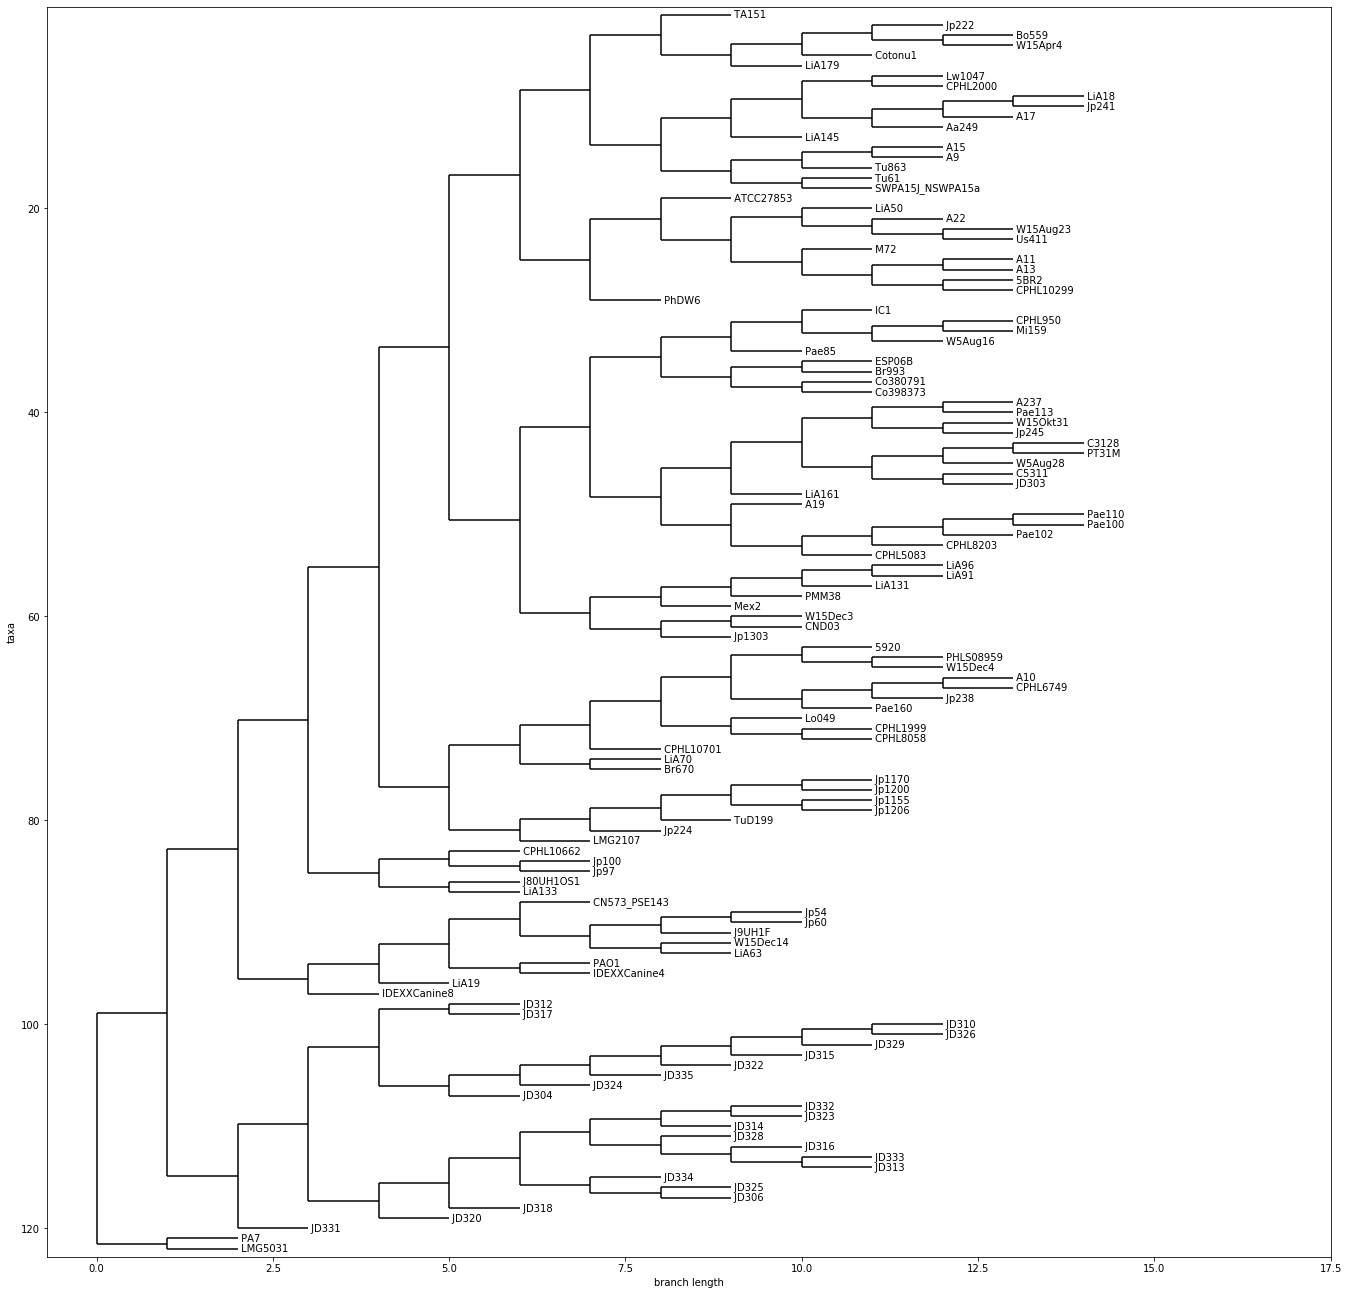

In [173]:
# visualize tree with biopython and matplotlib
tree = Phylo.read('pseudo_tree.dnd', format='newick')
plt.figure(figsize=(23, 23))
Phylo.draw(tree, axes=plt.gca())

# Experiment

## Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto', handle_unknown='ignore')

In [ ]:
sequence = []
for seq in records['sequence']:
    sequence.append([nucleotide for nucleotide in seq])

In [ ]:
sequence = np.array(sequence)
sequence.shape

In [ ]:
encode_seq = encoder.fit_transform(sequence)

In [ ]:
encode_seq

In [ ]:
for i in encode_seq[0]:
    print(i)

In [ ]:
len(encoder.get_feature_names())

## Remove redundant feature

In [ ]:
sequence = records['sequence']

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

In [ ]:
temp = pd.Series(['ACTG', 'CGTA'])
temp

In [ ]:
forward = str.maketrans('-ACTG', '01234')
backward = str.maketrans('01234', '-ACTG')
def transformation(str):
    return [int(i) for i in str.translate(forward)]

In [ ]:
print(selector.fit_transform(temp.apply(transformation).to_list()))
selector.get_support()

In [ ]:
%time tran = selector.fit_transform(sequence.apply(transformation).to_list())

In [ ]:
len(tran[0])

In [ ]:
tran_support = selector.get_support()

In [ ]:
from collections import Counter
Counter(tran_support)
for i, v in enumerate(tran_support):
    if not v:
        print(i)

In [ ]:
tran[0]

In [ ]:
tran[1]

In [ ]:
X = [['man'], ['woman'], ['man']]
e = OneHotEncoder()
X_trans  = e.fit_transform(X)
print(X_trans)

In [ ]:
X = [['A', 'C'], ['C', 'A'], ['T', 'G']]
e = OneHotEncoder()
X_trans  = e.fit_transform(X)
print(X_trans)

In [ ]:
e.categories_